Importing the neccesary libraries for data analysis and visualization

In [1]:
from matplotlib.pyplot import *
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import pandas as pd
import collections
from datetime import datetime


Reading the data

In [2]:
data = pd.read_csv('CE_train.csv')
test= pd.read_csv('CE_test.csv')


In [3]:
data.head() #prints the first 5 rows of the data

,Unnamed: 0,country,sector,value,timestamp,year,month,day
0,0,Brazil,Power,0.108768,1546272000,2019,1,1
1,1,China,Power,14.251000,1546272000,2019,1,1
2,2,EU27 & UK,Power,1.676920,1546272000,2019,1,1
3,3,France,Power,0.049075,1546272000,2019,1,1
4,4,Germany,Power,0.349691,1546272000,2019,1,1


In [4]:
test.head()

,Unnamed: 0,country,sector,value,timestamp,year,month,day
0,10318,Brazil,Power,0.362599,1610035200,2021,8,1
1,10319,China,Power,14.820200,1610035200,2021,8,1
2,10320,EU27 & UK,Power,3.665810,1610035200,2021,8,1
3,10321,France,Power,0.185953,1610035200,2021,8,1
4,10322,Germany,Power,0.991411,1610035200,2021,8,1


In [5]:
data= data.drop(['Unnamed: 0'], axis=1)
test= test.drop(['Unnamed: 0'], axis=1)

In [6]:
data.head()

,country,sector,value,timestamp,year,month,day
0,Brazil,Power,0.108768,1546272000,2019,1,1
1,China,Power,14.251000,1546272000,2019,1,1
2,EU27 & UK,Power,1.676920,1546272000,2019,1,1
3,France,Power,0.049075,1546272000,2019,1,1
4,Germany,Power,0.349691,1546272000,2019,1,1


In [7]:
data.head()

,country,sector,value,timestamp,year,month,day
0,Brazil,Power,0.108768,1546272000,2019,1,1
1,China,Power,14.251000,1546272000,2019,1,1
2,EU27 & UK,Power,1.676920,1546272000,2019,1,1
3,France,Power,0.049075,1546272000,2019,1,1
4,Germany,Power,0.349691,1546272000,2019,1,1


In [8]:
#data= data.drop(['date'],axis=1)

In [9]:
data.head()

,country,sector,value,timestamp,year,month,day
0,Brazil,Power,0.108768,1546272000,2019,1,1
1,China,Power,14.251000,1546272000,2019,1,1
2,EU27 & UK,Power,1.676920,1546272000,2019,1,1
3,France,Power,0.049075,1546272000,2019,1,1
4,Germany,Power,0.349691,1546272000,2019,1,1


In [10]:
data['month'].value_counts()

5     7308
3     7308
1     7308
6     7056
4     7056
2     6566
7     5712
12    5208
10    5208
8     5208
11    5040
9     5040
Name: month, dtype: int64

In [11]:
data.head()

,country,sector,value,timestamp,year,month,day
0,Brazil,Power,0.108768,1546272000,2019,1,1
1,China,Power,14.251000,1546272000,2019,1,1
2,EU27 & UK,Power,1.676920,1546272000,2019,1,1
3,France,Power,0.049075,1546272000,2019,1,1
4,Germany,Power,0.349691,1546272000,2019,1,1


Visualization

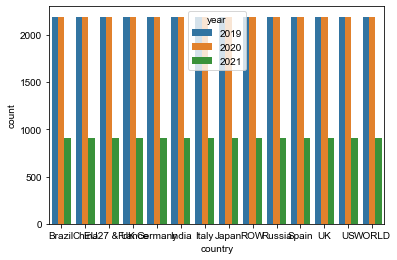

In [12]:
sns.countplot(data["country"],hue=data["year"])
sns.set(rc={'figure.figsize':(15,25)})
#this viz shows that the amount of data available for the year 2019/2020  for each country is quite the same(no outlier) 

Text(0, 0.5, 'value')

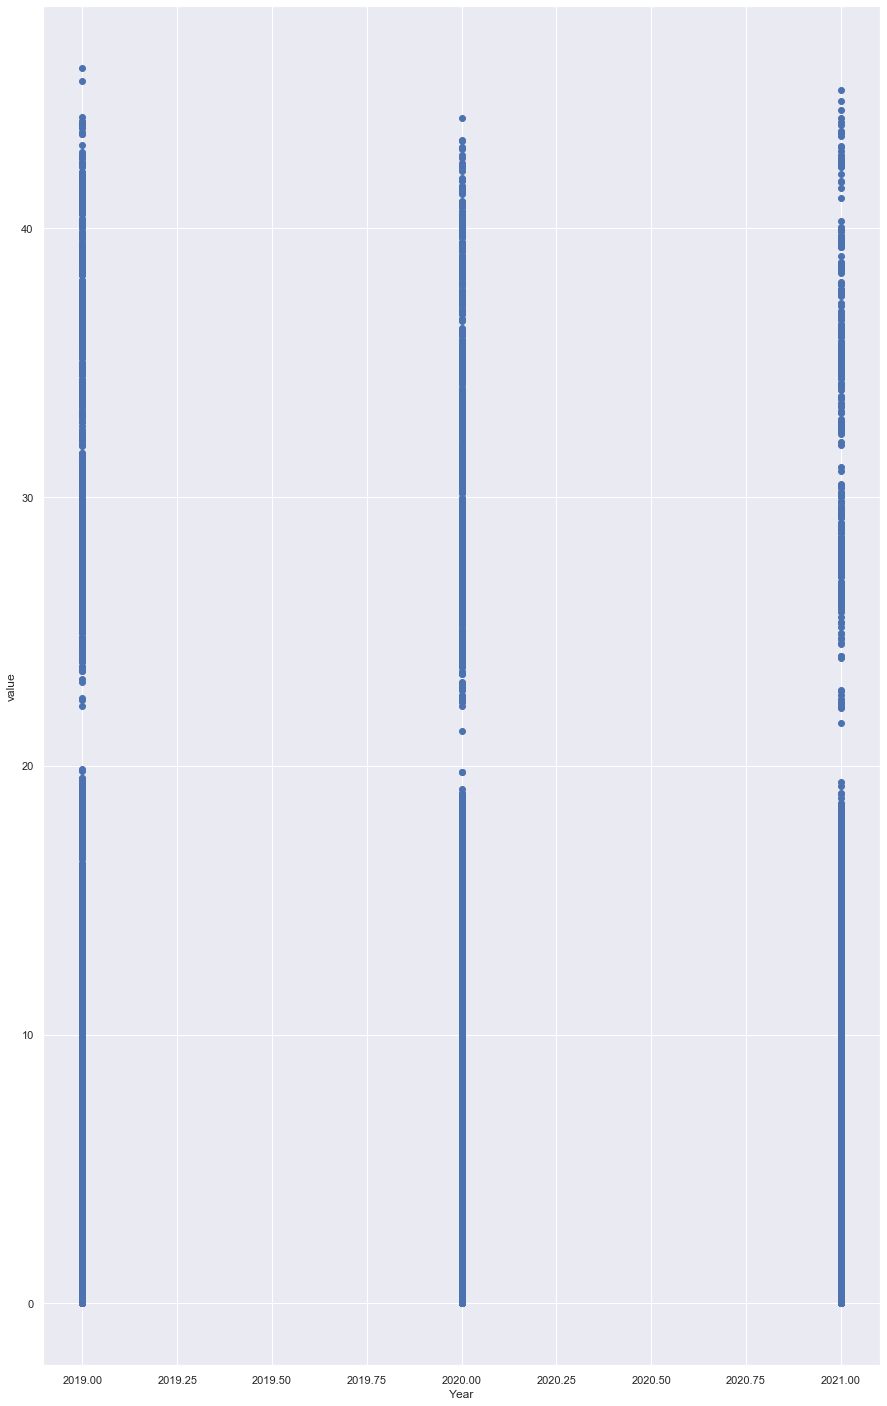

In [13]:
plt.scatter(data["year"],data["value"])
plt.xlabel("Year")
plt.ylabel("value")
#plotting the target "value" against year (some outliers in 2019 but the data looks normal)

Text(0, 0.5, 'value')

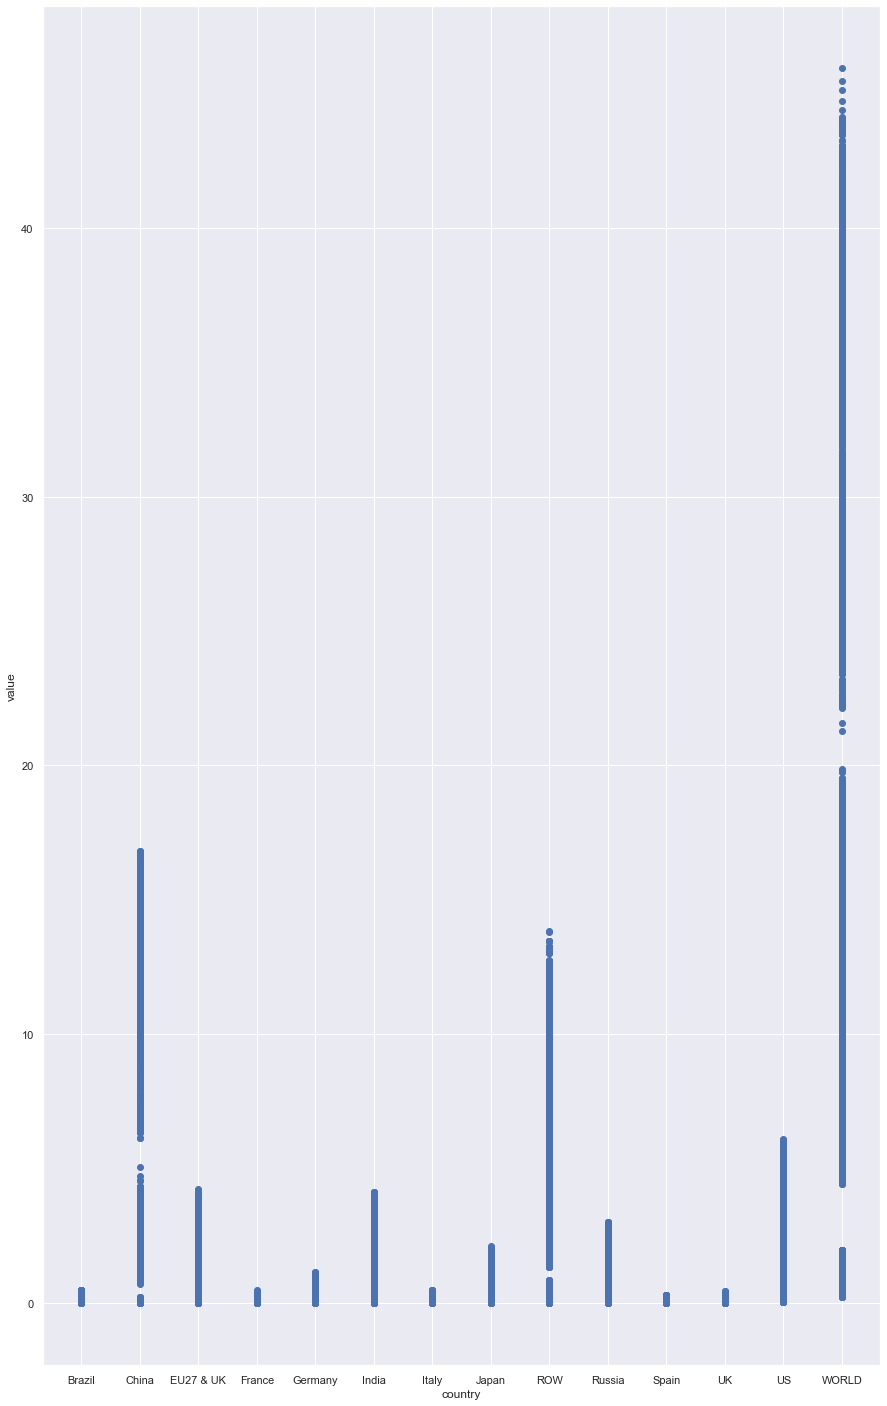

In [14]:
plt.scatter(data["country"],data["value"])
plt.xlabel("country")
plt.ylabel("value")
#china tops the carbon emission list,U.S comes second, ROW , EU27&UK World are combined contries

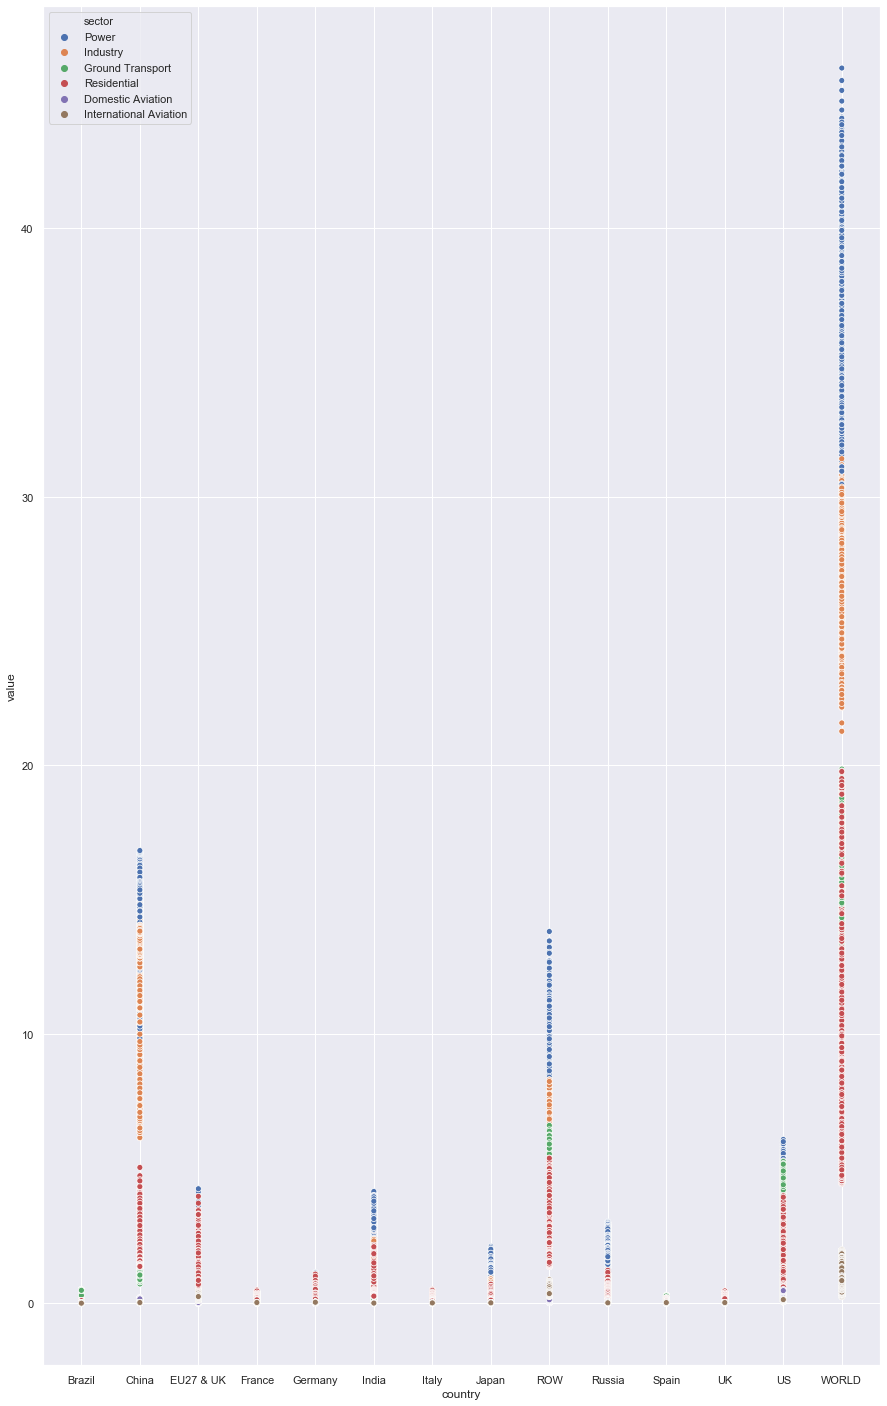

In [15]:
sns.scatterplot(data["country"],data["value"],hue=data["sector"])
#this shows which sector seems to be more dominant in the countries

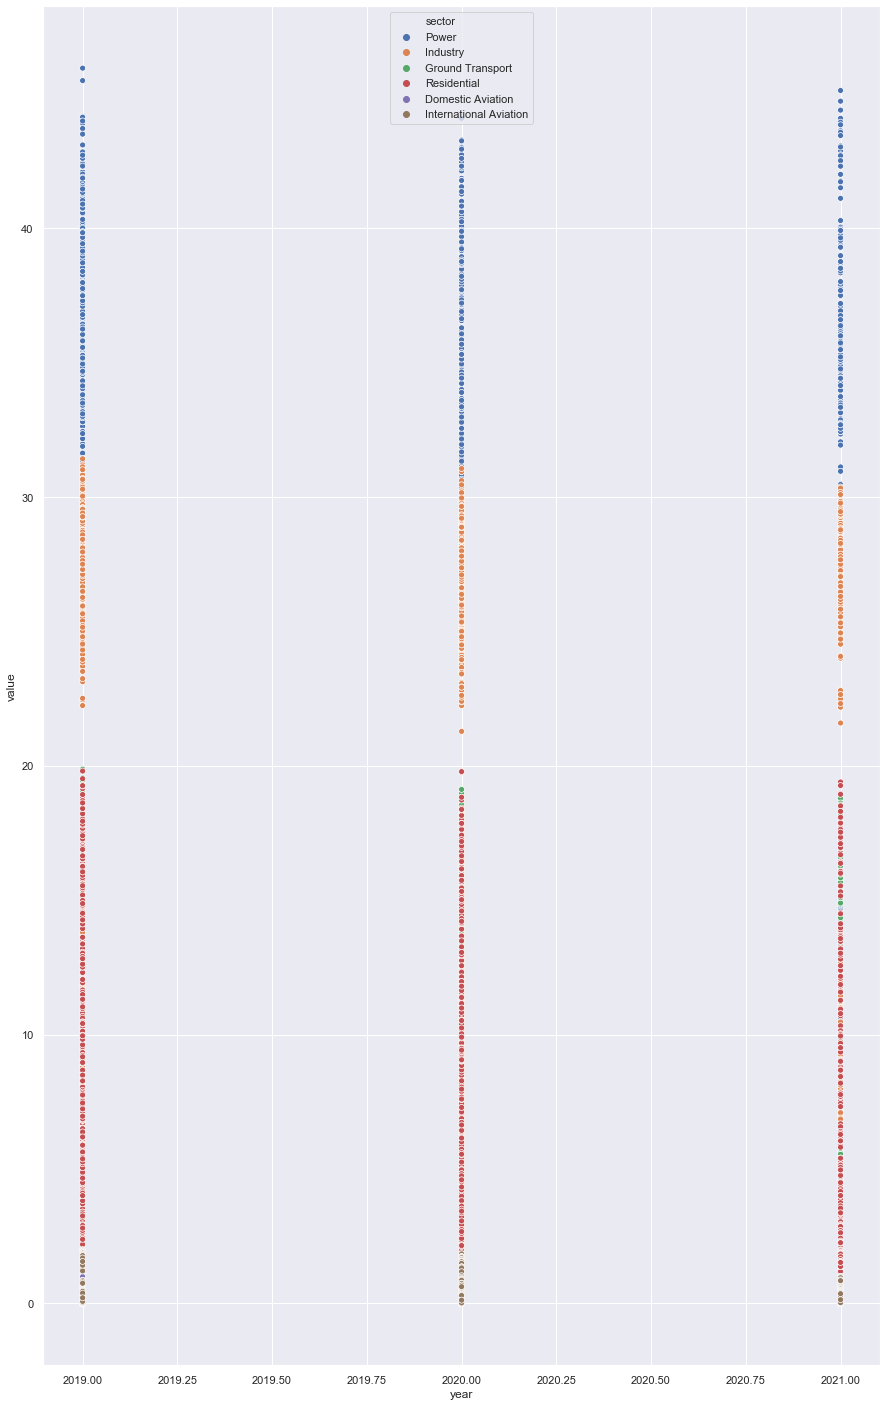

In [16]:
sns.scatterplot(data["year"],data["value"],hue=data["sector"])
#amount of emissions genereated from each sector for every year

Data Preprocessing

In [17]:
data = pd.get_dummies(data, columns = ['country'],drop_first=True)
test = pd.get_dummies(test, columns = ['country'],drop_first=True)

In [18]:
data.head()

,sector,value,timestamp,year,month,day,country_China,country_EU27 & UK,country_France,country_Germany,country_India,country_Italy,country_Japan,country_ROW,country_Russia,country_Spain,country_UK,country_US,country_WORLD
0,Power,0.108768,1546272000,2019,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Power,14.251000,1546272000,2019,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Power,1.676920,1546272000,2019,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Power,0.049075,1546272000,2019,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Power,0.349691,1546272000,2019,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [19]:
datetime.fromtimestamp(data["timestamp"][0])

datetime.datetime(2018, 12, 31, 17, 0)

In [20]:
datetime.fromtimestamp(data["timestamp"][1])

datetime.datetime(2018, 12, 31, 17, 0)

In [21]:
datetime.fromtimestamp(data["timestamp"][333])

datetime.datetime(2019, 1, 23, 17, 0)

In [22]:
datetime.fromtimestamp(data["timestamp"][334])

datetime.datetime(2019, 1, 23, 17, 0)

In [23]:
data.drop("timestamp",axis=1, inplace=True)
test.drop("timestamp",axis=1, inplace=True)

In [24]:
data.groupby('sector',)['value'].mean()

sector
Domestic Aviation         0.121449
Ground Transport          2.511223
Industry                  3.941626
International Aviation    0.180236
Power                     5.286002
Residential               1.490909
Name: value, dtype: float64

In [25]:
data['sector'].replace(['Power','Industry','Ground Transport','Residential','International Aviation','Domestic Aviation'],[6,5,4,3,2,1],inplace= True)
test['sector'].replace(['Power','Industry','Ground Transport','Residential','International Aviation','Domestic Aviation'],[6,5,4,3,2,1],inplace= True)

Train and test with Simple Random Forest Regressor

In [26]:
test1=test.drop('value',axis=1)

In [27]:
test_values=test.value

In [28]:
y = data.value
x = data.drop('value', axis =1)


In [34]:
x.tail()

,sector,year,month,day,country_China,country_EU27 & UK,country_France,country_Germany,country_India,country_Italy,country_Japan,country_ROW,country_Russia,country_Spain,country_UK,country_US,country_WORLD
74013,2,2021,6,30,0,0,0,0,0,0,0,0,1,0,0,0,0
74014,2,2021,6,30,0,0,0,0,0,0,0,0,0,1,0,0,0
74015,2,2021,6,30,0,0,0,0,0,0,0,0,0,0,1,0,0
74016,2,2021,6,30,0,0,0,0,0,0,0,0,0,0,0,1,0
74017,2,2021,6,30,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.linear_model import LinearRegression #logistic regression
from sklearn.ensemble import RandomForestRegressor #Random Forest
from sklearn import metrics #accuracy measure
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



In [30]:
def rmse(y_val,prediction):
    ans=np.sqrt(mean_squared_error(y_val,prediction))
    return ans

In [31]:
X_train, X_test, y_train , y_test = train_test_split(x,y,test_size= 0.3,random_state=0)

In [32]:
model= RandomForestRegressor(n_estimators=100, max_depth=20)
model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [41]:
rmse(y_test,predictions)

0.3517216848165692

Using the Model on the Validation Datasets

In [42]:
predictions2=model.predict(test1)

In [43]:
rmse(test_values,predictions2)

0.4626657515358013

In [35]:
countries=[0 for i in range(13)]

In [39]:
countries[0]

1

In [40]:
countries+countries

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [42]:
[0 for i in range(13)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [45]:
[3,4,5,6][:3]

[3, 4, 5]